In [33]:
import pandas as pd
import datetime
import  matplotlib.pyplot as plt
import seaborn as  sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
credentials_path = '../pamf-dwh-775beaae50ff.json'
project_id = 'pamf-dwh'

In [35]:
sql = 'SELECT * FROM `pamf-dwh.DFS_VIEW.deboursement_repayement`'
df_data = pd.read_gbq( sql, project_id, private_key=credentials_path, dialect='standard')

In [36]:
df_data.sort_values('loloanID',inplace=True)

In [37]:
df_data.Status.value_counts() / len(df_data)

12    0.868701
4     0.091969
10    0.039330
Name: Status, dtype: float64

In [38]:
# remove writeoff
#writeoff_client = df_data[df_data.Status==10]['rContactID'].unique()
#df_data = df_data[df_data.rContactID.isin(writeoff_client  ) ==False]

# remove encours
#client_encours = df_data[ df_data.Status==4 ]['rContactID'].values
#df_data=df_data[df_data.rContactID.isin(client_encours)==False]

In [39]:
df_data.head(10)

,loloanID,rContactID,disbursement_date,Montantdeloctroi,Status,last_payement,total_principal_paid,total_admin_paid,penality_paid,account_Number,total_penalty_paid,loApplicationID,disbursement_datetime,day_late
61866,21,25,2018-03-27 00:00:00+00:00,20000.0,12,2018-03-27 00:00:00+00:00,20000.0,1400.0,NaN,PAMF-25-006,NaN,None,2018-03-27 16:27:05.573000+00:00,-30.0
69761,22,28,2018-03-27 00:00:00+00:00,15000.0,12,2018-03-28 00:00:00+00:00,15000.0,1050.0,NaN,PAMF-28-002,NaN,None,2018-03-27 16:33:08.580000+00:00,-29.0
23532,29,24,2018-03-27 00:00:00+00:00,10000.0,12,2018-05-03 00:00:00+00:00,10000.0,700.0,NaN,PAMF-24-007,NaN,None,2018-03-27 16:46:50.390000+00:00,7.0
75013,31,27,2018-03-27 00:00:00+00:00,5000.0,12,2018-03-28 00:00:00+00:00,5000.0,350.0,NaN,PAMF-27-004,NaN,None,2018-03-27 18:14:54.617000+00:00,-29.0
72487,32,26,2018-03-27 00:00:00+00:00,50000.0,12,2018-03-28 00:00:00+00:00,50000.0,3500.0,NaN,PAMF-26-004,NaN,None,2018-03-27 18:40:03.293000+00:00,-29.0
70056,34,25,2018-03-27 00:00:00+00:00,30000.0,12,2018-03-28 00:00:00+00:00,30000.0,2100.0,NaN,PAMF-25-008,NaN,None,2018-03-27 19:30:55.520000+00:00,-29.0
73245,39,34,2018-03-28 00:00:00+00:00,6000.0,12,2018-03-29 00:00:00+00:00,6000.0,420.0,NaN,PAMF-34-003,NaN,None,2018-03-28 10:35:11.810000+00:00,-29.0
52095,41,31,2018-03-28 00:00:00+00:00,75000.0,12,2018-04-04 00:00:00+00:00,75000.0,5250.0,NaN,PAMF-31-002,NaN,None,2018-03-28 11:16:26.100000+00:00,-23.0
63297,54,30,2018-03-28 00:00:00+00:00,45000.0,12,2018-03-28 00:00:00+00:00,45000.0,3150.0,NaN,PAMF-30-002,NaN,None,2018-03-28 13:55:26.987000+00:00,-30.0
38680,60,29,2018-03-28 00:00:00+00:00,20000.0,12,2018-04-24 00:00:00+00:00,20000.0,1400.0,NaN,PAMF-29-002,NaN,None,2018-03-28 14:18:57.950000+00:00,-3.0


In [40]:
df_data['num_loan'] = df_data.groupby('rContactID').cumcount()+1

In [41]:
def resetDayLate(montant, total_principal, disdate , last_payement):
    ddata = pd.datetime.today() - datetime.timedelta(days=1)
    if montant == total_principal:
        return  (last_payement - disdate).days -30
    else:
        return (ddata - disdate).days -30

In [42]:
df_data['day_late'] = df_data.apply(lambda x: resetDayLate(x['Montantdeloctroi'],x['total_principal_paid'] , x['disbursement_date']  , x['last_payement'] ) , axis=1)

TypeError: ('Timestamp subtraction must have the same timezones or no timezones', 'occurred at index 20886')

In [43]:
df_data.head(4)

,loloanID,rContactID,disbursement_date,Montantdeloctroi,Status,last_payement,total_principal_paid,total_admin_paid,penality_paid,account_Number,total_penalty_paid,loApplicationID,disbursement_datetime,day_late,num_loan
61866,21,25,2018-03-27 00:00:00+00:00,20000.0,12,2018-03-27 00:00:00+00:00,20000.0,1400.0,NaN,PAMF-25-006,NaN,None,2018-03-27 16:27:05.573000+00:00,-30.0,1
69761,22,28,2018-03-27 00:00:00+00:00,15000.0,12,2018-03-28 00:00:00+00:00,15000.0,1050.0,NaN,PAMF-28-002,NaN,None,2018-03-27 16:33:08.580000+00:00,-29.0,1
23532,29,24,2018-03-27 00:00:00+00:00,10000.0,12,2018-05-03 00:00:00+00:00,10000.0,700.0,NaN,PAMF-24-007,NaN,None,2018-03-27 16:46:50.390000+00:00,7.0,1
75013,31,27,2018-03-27 00:00:00+00:00,5000.0,12,2018-03-28 00:00:00+00:00,5000.0,350.0,NaN,PAMF-27-004,NaN,None,2018-03-27 18:14:54.617000+00:00,-29.0,1


In [44]:
df_data['is_default'] = df_data.day_late >60

In [45]:
df_data.head(4)

,loloanID,rContactID,disbursement_date,Montantdeloctroi,Status,last_payement,total_principal_paid,total_admin_paid,penality_paid,account_Number,total_penalty_paid,loApplicationID,disbursement_datetime,day_late,num_loan,is_default
61866,21,25,2018-03-27 00:00:00+00:00,20000.0,12,2018-03-27 00:00:00+00:00,20000.0,1400.0,NaN,PAMF-25-006,NaN,None,2018-03-27 16:27:05.573000+00:00,-30.0,1,False
69761,22,28,2018-03-27 00:00:00+00:00,15000.0,12,2018-03-28 00:00:00+00:00,15000.0,1050.0,NaN,PAMF-28-002,NaN,None,2018-03-27 16:33:08.580000+00:00,-29.0,1,False
23532,29,24,2018-03-27 00:00:00+00:00,10000.0,12,2018-05-03 00:00:00+00:00,10000.0,700.0,NaN,PAMF-24-007,NaN,None,2018-03-27 16:46:50.390000+00:00,7.0,1,False
75013,31,27,2018-03-27 00:00:00+00:00,5000.0,12,2018-03-28 00:00:00+00:00,5000.0,350.0,NaN,PAMF-27-004,NaN,None,2018-03-27 18:14:54.617000+00:00,-29.0,1,False


In [46]:
df_data.head(4)

,loloanID,rContactID,disbursement_date,Montantdeloctroi,Status,last_payement,total_principal_paid,total_admin_paid,penality_paid,account_Number,total_penalty_paid,loApplicationID,disbursement_datetime,day_late,num_loan,is_default
61866,21,25,2018-03-27 00:00:00+00:00,20000.0,12,2018-03-27 00:00:00+00:00,20000.0,1400.0,NaN,PAMF-25-006,NaN,None,2018-03-27 16:27:05.573000+00:00,-30.0,1,False
69761,22,28,2018-03-27 00:00:00+00:00,15000.0,12,2018-03-28 00:00:00+00:00,15000.0,1050.0,NaN,PAMF-28-002,NaN,None,2018-03-27 16:33:08.580000+00:00,-29.0,1,False
23532,29,24,2018-03-27 00:00:00+00:00,10000.0,12,2018-05-03 00:00:00+00:00,10000.0,700.0,NaN,PAMF-24-007,NaN,None,2018-03-27 16:46:50.390000+00:00,7.0,1,False
75013,31,27,2018-03-27 00:00:00+00:00,5000.0,12,2018-03-28 00:00:00+00:00,5000.0,350.0,NaN,PAMF-27-004,NaN,None,2018-03-27 18:14:54.617000+00:00,-29.0,1,False


In [47]:
df_data.is_default.value_counts() / len(df_data)

False    0.985838
True     0.014162
Name: is_default, dtype: float64

In [ ]:
df_data['day_late'] = df_data['day_late'].apply(lambda x: 0 if x<=0 else x)
df_data['cum_loan_day_late'] = df_data.groupby('rContactID',as_index=False)['day_late'].cumsum()

In [ ]:
df_data['cum_loan_day_late'] = df_data['cum_loan_day_late'] - df_data['day_late']

In [ ]:
beenDelinquent = df_data[df_data.day_late > 0]
beenDelinquent['num_loan_in_delinq'] = beenDelinquent.groupby('rContactID').cumcount()+1

In [ ]:
beenDelinquent.tail()

In [ ]:
df_data  = df_data.merge(beenDelinquent[['loloanID','num_loan_in_delinq']] ,  how='left' )
df_data['num_loan_in_delinq'] = df_data.groupby('rContactID')['num_loan_in_delinq'].fillna(method='ffill')
#test.groupby('rContactID')['num_loan_in_delinq'].fillna(method='ffill', inplace=True)
#df_data.num_loan_in_delinq.fillna()
#df_data.groupby(['rContactID'])['num_loan_in_delinq'].fillna(method='ffill', inplace=True)
# df_data = df_data.groupby(['rContactID'], as_index=False)[].apply(lambda group: group.ffill())


In [ ]:
df_data.num_loan_in_delinq.fillna(0,inplace=True)

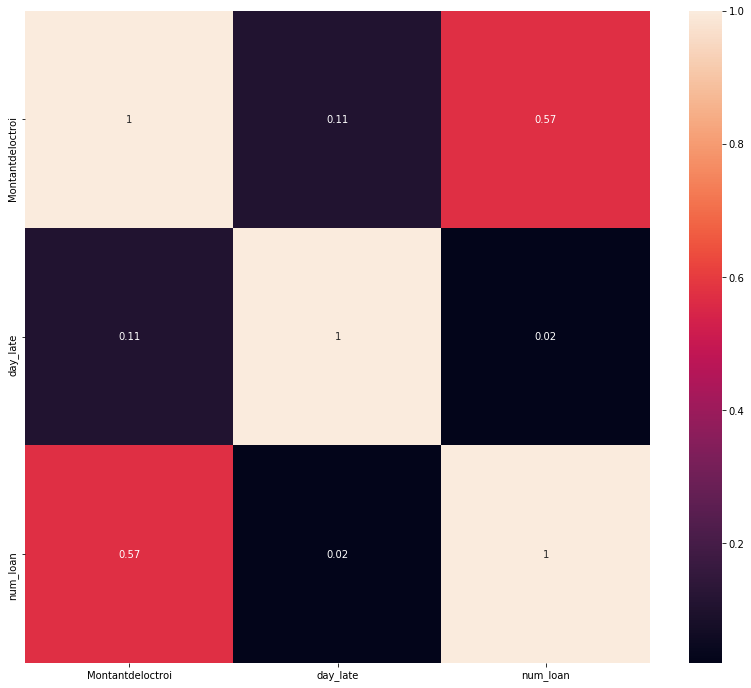

In [17]:
corr = df_data.drop(['rContactID' , 'Status', 'loloanID','penality_paid' ,'total_admin_paid' ,'total_penalty_paid','total_principal_paid'],axis=1).corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr.abs(), annot=True, fmt=".2g")

Pour tout les prets déboursé jusqu'a ce jours , 
Montant de l'octroi est fortement corréler avec :
    
        * cycle de prets , et le nombre de prets en délinquance

In [18]:
# nombre de prets en retard

In [30]:
dd = df_data[df_data.Montantdeloctroi>=200000]

In [31]:
dd['num_high_loan'] = dd.groupby('rContactID').cumcount()+1
dd['cum_high_loan_day_late'] = dd.groupby('rContactID')['day_late'].cumsum()
dd['cum_high_loan_day_late'] = dd['cum_high_loan_day_late'] - dd['day_late']

In [32]:
dd.describe()

,loloanID,rContactID,Montantdeloctroi,Status,total_principal_paid,total_admin_paid,penality_paid,total_penalty_paid,day_late,num_loan,num_high_loan,cum_high_loan_day_late
count,7.789900e+04,77899.000000,77899.000000,77899.000000,68173.000000,71177.000000,0.0,10876.000000,71321.000000,77899.000000,77899.000000,71321.000000
mean,1.741564e+06,33144.944723,228200.360903,10.990950,224721.480161,18651.213004,NaN,11404.193362,-1.997084,10.866930,3.751858,-15.767544
std,6.382230e+05,26118.005731,19380.459734,2.609478,31096.465063,4314.378231,NaN,2729.462268,15.155871,4.019064,2.992587,40.593082
min,4.980000e+02,26.000000,200000.000000,4.000000,45.000000,1.000000,NaN,1.000000,-30.000000,1.000000,1.000000,-1598.000000
25%,1.325210e+06,12443.000000,225000.000000,12.000000,225000.000000,15750.000000,NaN,11746.000000,-6.000000,8.000000,2.000000,-21.000000
50%,1.820507e+06,26972.000000,225000.000000,12.000000,225000.000000,20250.000000,NaN,12205.000000,-2.000000,10.000000,3.000000,-4.000000
75%,2.239274e+06,47940.000000,225000.000000,12.000000,225000.000000,20250.000000,NaN,12254.000000,0.000000,13.000000,5.000000,0.000000
max,2.791432e+06,155643.000000,300000.000000,12.000000,300000.000000,27000.000000,NaN,16350.000000,323.000000,84.000000,62.000000,133.000000


In [22]:
len(dd)

77899

In [23]:
dd.num_loan_in_delinq.fillna(0,inplace=True)

AttributeError: 'DataFrame' object has no attribute 'num_loan_in_delinq'

In [ ]:
dd.drop(['disbursement_datetime','loApplicationID', 'account_Number', "total_principal_paid" , 'total_penalty_paid', 'total_admin_paid','penality_paid'], axis=1 , inplace=True)

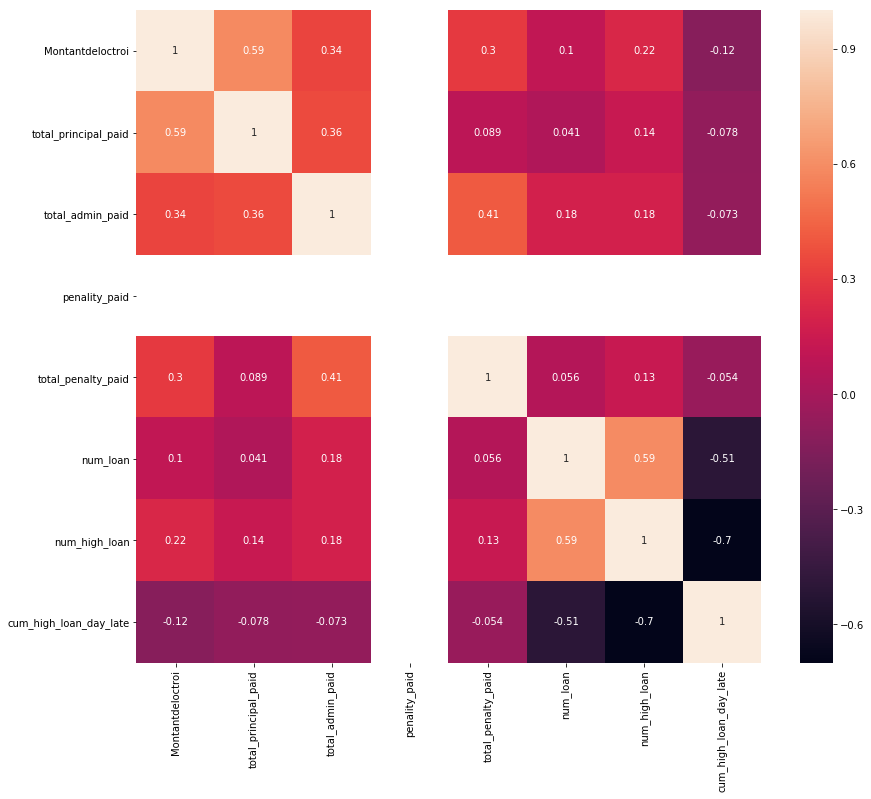

In [24]:
corr = dd.drop(['rContactID', 'day_late','Status' , 'loloanID'],axis=1).corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2g")

In [25]:
import seaborn as sns

ValueError: cannot convert float NaN to integer

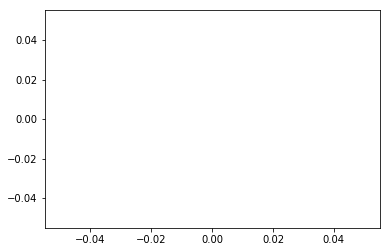

In [26]:
sns.distplot(dd.cum_high_loan_day_late)

In [ ]:
dd.cum_high_loan_day_late.hist()

In [28]:
#let's first try the penalized model Logit by providing the class_weight="balanced" parameter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict #to perform stratified sampling using cv param
from sklearn.metrics import roc_curve, roc_auc_score #AUC score
from sklearn.preprocessing import StandardScaler
train = dd.drop(["loloanID", "rContactID" ,'Status','disbursement_date','day_late','last_payement'] , axis=1)
X = train.drop("is_default", axis=1).copy()
y = train.is_default

X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42)
logit = LogisticRegression(random_state=42, solver="saga", penalty="l1", class_weight="balanced", C=1.0, max_iter=500)
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train) #scaling features!
X_val_scaled = scaler.transform(X_val)

logit.fit(X_train_scaled, y_train)
logit_scores_proba = logit.predict_proba(X_train_scaled)
logit_scores = logit_scores_proba[:,1]

#sns.kdeplot(logit_scores_proba[y_train==1][:,0], shade=1, color='red',label='delfault')
#sns.kdeplot(logit_scores_proba[y_train==0][:,0] , shade=1, color='green',label='sains'); 

dd['proba'] = logit.predict_proba( scaler.transform( dd[X.columns ] ) )[:,1]



KeyError: "['is_default'] not found in axis"

In [29]:
dd['predicted_default'] = dd.proba >0.5
dd['predictid_score'] = dd.proba.apply(lambda x: int(x*10))

AttributeError: 'DataFrame' object has no attribute 'proba'

In [33]:
import shap
import numpy as np
shap.initjs()
# we use the first 100 training examples as our background dataset to integrate over
#X_shap = X_train_rus_scaled[:2000 , :]

indices = np.random.choice(X_train_scaled.shape[0], 5000, replace=False)

In [34]:
X_shap = X_train_scaled[indices]


shap_explainer = shap.LinearExplainer(logit, X_shap )

# explain the first 10 predictions
# explaining each prediction requires 2 * background dataset size runs
shap_val = shap_explainer.shap_values(X_shap)

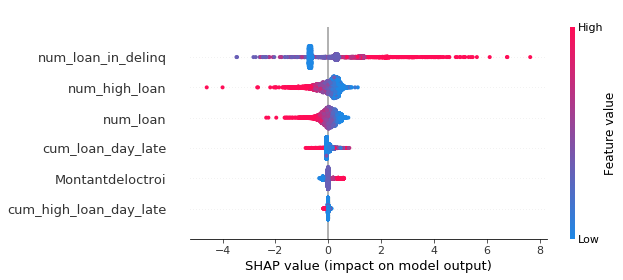

In [35]:
shap.summary_plot(shap_values=shap_val, features=X_shap, feature_names=X_train.columns ,layered_violin_max_num_bins=50)

In [36]:
default= dd[dd.is_default==True]
sains = dd[dd.is_default==False]

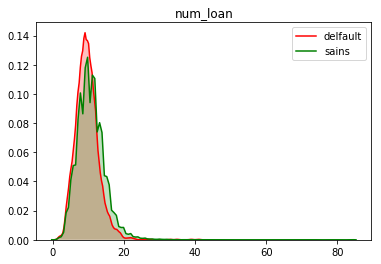

In [38]:
#sns.distplot(default.num_loan)
#sns.distplot(sains.num_loan)

def plotDistribution(col):
    plt.title(col)
    sns.kdeplot(default[col], shade=1, color='red',label='delfault')
    sns.kdeplot(sains[col], shade=1, color='green',label='sains'); 
    plt.show()
plotDistribution('num_loan')    

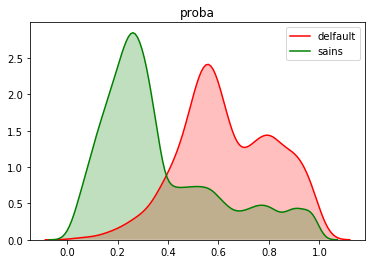

In [39]:
plotDistribution('proba')

In [40]:
pd.crosstab(dd.is_default,dd.predicted_default)*100 /len(dd)

predicted_default,False,True
is_default,,
False,73.138721,23.373228
True,0.794829,2.693222


In [41]:
pd.crosstab(dd.is_default,dd.predictid_score,margins=True).T

is_default,False,True,All
predictid_score,,,
0,4475,7,4482
1,13354,21,13375
2,20217,70,20287
3,12325,154,12479
4,5300,353,5653
5,5244,670,5914
6,3242,395,3637
7,3354,369,3723
8,2915,343,3258


In [42]:
dd[(dd.predictid_score.isin([0])==True) & (dd.Status==10) ].rContactID.nunique()

3

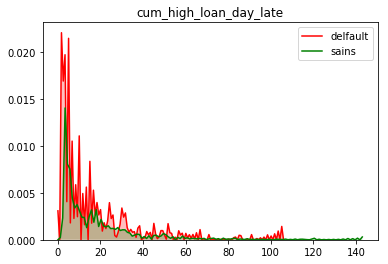

In [43]:
plotDistribution('cum_high_loan_day_late')

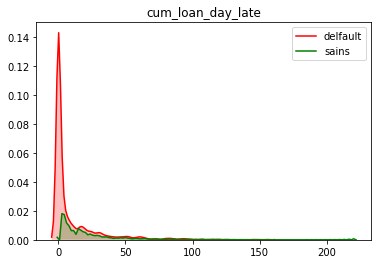

In [44]:
plotDistribution('cum_loan_day_late')

on peut conclure que 

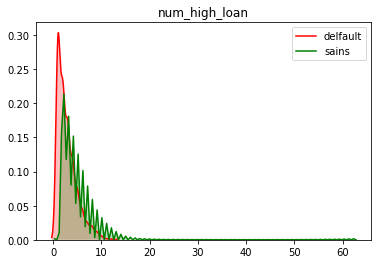

In [45]:
plotDistribution('num_high_loan')

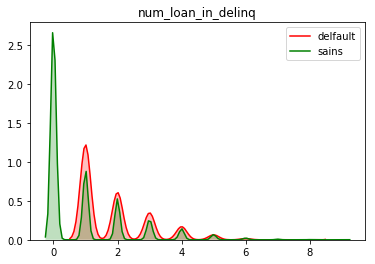

In [46]:
plotDistribution('num_loan_in_delinq')

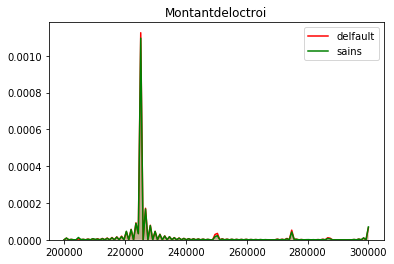

In [47]:
plotDistribution('Montantdeloctroi')

premier: prets à 200K est risquer , num_high loan est discriminant

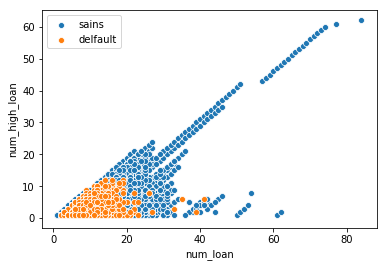

In [48]:
sns.scatterplot(x='num_loan',y='num_high_loan',data=sains,label='sains')
sns.scatterplot(x='num_loan',y='num_high_loan',data=default, label='delfault')

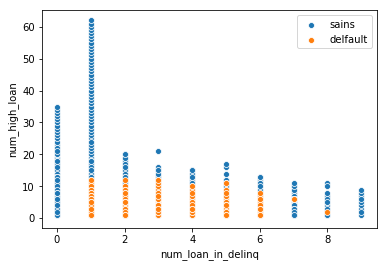

In [49]:
sns.scatterplot(x='num_loan_in_delinq',y='num_high_loan',data=sains,label='sains')
sns.scatterplot(x='num_loan_in_delinq',y='num_high_loan',data=default, label='delfault')

In [50]:
pd.crosstab(default.num_loan,default.num_high_loan)*100/len(default)

num_high_loan,1,2,3,4,5,6,7,8,9,10,11,12
num_loan,,,,,,,,,,,,
2,0.263653,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.150659,0.188324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2.259887,0.263653,0.075330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,3.126177,1.280603,0.112994,0.112994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2.561205,2.184557,1.242938,0.112994,0.188324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,4.030132,2.372881,2.109228,1.092279,0.150659,0.037665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,4.067797,3.201507,2.372881,1.581921,0.828625,0.037665,0.150659,0.000000,0.000000,0.000000,0.000000,0.000000
9,4.331450,3.126177,2.636535,1.732580,1.431262,0.828625,0.075330,0.075330,0.037665,0.000000,0.000000,0.000000
10,3.578154,3.502825,2.448211,1.544256,1.167608,0.828625,0.414313,0.075330,0.000000,0.000000,0.000000,0.000000


In [51]:
pd.crosstab(sains.num_loan,sains.num_high_loan)*100/len(sains)

num_high_loan,1,2,3,4,5,6,7,8,9,10,...,53,54,55,56,57,58,59,60,61,62
num_loan,,,,,,,,,,,,,,,,,,,,,
1,0.021780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.179685,0.005445,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.181046,0.122512,0.001361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.734230,0.148376,0.092565,0.001361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2.290980,1.087637,0.108900,0.074869,0.001361,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2.308677,1.711089,0.809943,0.100732,0.061256,0.001361,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2.947102,1.961558,1.599466,0.716016,0.088481,0.059895,0.001361,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,3.223435,2.458414,1.692031,1.445645,0.642509,0.083036,0.051727,0.001361,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,3.005636,2.521031,2.084071,1.452452,1.257793,0.569002,0.073507,0.047644,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [52]:
writeoff = dd[dd.Status==10]

In [54]:
dd[(dd.num_loan>20) & (dd.num_high_loan>10)].is_default.value_counts()

False    429
Name: is_default, dtype: int64

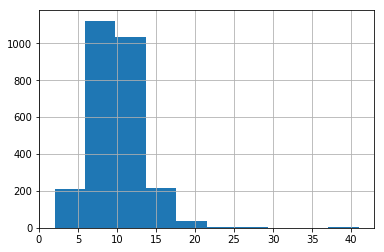

In [69]:
default.num_loan.hist()

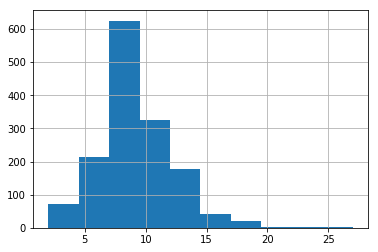

In [72]:
writeoff.num_loan.hist()

In [118]:
dd[(dd.Status==4 ) ].is_default.value_counts()

False    8637
True      907
Name: is_default, dtype: int64

In [55]:
dd.rContactID.nunique()

18893

In [56]:
df_data.rContactID.nunique()

105682

In [57]:
dd.is_default.value_counts()/len(dd)

False    0.965119
True     0.034881
Name: is_default, dtype: float64

4% des prets de gros montant sont tombé en default 

96% des prets avant sains

In [58]:
dd

,loloanID,rContactID,disbursement_date,Montantdeloctroi,Status,last_payement,day_late,num_loan,is_default,cum_loan_day_late,num_loan_in_delinq,num_high_loan,cum_high_loan_day_late,proba,predicted_default,predictid_score
106,498,159,2018-04-09,225000.0,12,2018-04-25,0,2,False,0,0.0,1,0,0.386648,False,3
991,4229,1685,2018-04-17,225000.0,12,2018-05-15,0,2,False,0,0.0,1,0,0.386648,False,3
2992,10037,618,2018-04-21,200000.0,12,2018-05-04,0,2,False,0,0.0,1,0,0.321316,False,3
4749,15531,3456,2018-04-25,225000.0,12,2018-04-30,0,2,False,0,0.0,1,0,0.386648,False,3
5106,16616,2910,2018-04-26,235000.0,12,2018-05-09,0,2,False,0,0.0,1,0,0.414134,False,4
6172,19707,8025,2018-04-27,235000.0,12,2018-05-21,0,1,False,0,0.0,1,0,0.426681,False,4
6666,21223,4595,2018-04-28,200000.0,12,2018-05-06,0,1,False,0,0.0,1,0,0.332647,False,3
6710,21341,1562,2018-04-28,200000.0,12,2018-05-01,0,2,False,0,0.0,1,0,0.321316,False,3
7638,24203,3456,2018-04-30,235000.0,12,2018-05-07,0,3,False,0,0.0,2,0,0.362656,False,3
7973,25158,4337,2018-04-30,200000.0,12,2018-06-02,3,2,False,0,1.0,1,0,0.598704,True,5


In [59]:
df_data[df_data]

ValueError: Must pass DataFrame with boolean values only

remove who have been defaulted

In [ ]:
neverDefault = dd[dd.rContactID.isin( default.rContactID.unique() )  ==False ]

In [ ]:
neverDefault.describe()

In [60]:
dd[dd.cum_high_loan_day_late==114]

,loloanID,rContactID,disbursement_date,Montantdeloctroi,Status,last_payement,day_late,num_loan,is_default,cum_loan_day_late,num_loan_in_delinq,num_high_loan,cum_high_loan_day_late,proba,predicted_default,predictid_score
495255,2031233,8379,2019-03-28,225000.0,12,2019-04-25,0,10,False,114,1.0,3,114,0.023274,False,0
550654,2252956,8379,2019-04-25,250000.0,12,2019-05-25,0,11,False,114,1.0,4,114,0.024904,False,0
605080,2479393,13353,2019-05-22,250000.0,12,2019-06-15,0,14,False,114,3.0,6,114,0.135016,False,1
647540,2660549,8379,2019-06-12,200000.0,4,NaT,0,13,False,114,1.0,5,114,0.010894,False,0
653566,2686387,13353,2019-06-15,225000.0,4,NaT,0,15,False,114,3.0,7,114,0.086228,False,0


In [61]:
pd.crosstab(dd.Status, dd.is_default)

is_default,False,True
Status,,
4,8612,924
10,0,1487
12,64850,244


In [62]:
verygood = dd[(dd.num_high_loan>4) & (dd.day_late==0)]
verygood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19674 entries, 42275 to 665191
Data columns (total 16 columns):
loloanID                  19674 non-null int64
rContactID                19674 non-null int64
disbursement_date         19674 non-null datetime64[ns]
Montantdeloctroi          19674 non-null float64
Status                    19674 non-null int64
last_payement             16544 non-null datetime64[ns]
day_late                  19674 non-null int64
num_loan                  19674 non-null int64
is_default                19674 non-null bool
cum_loan_day_late         19674 non-null int64
num_loan_in_delinq        19674 non-null float64
num_high_loan             19674 non-null int64
cum_high_loan_day_late    19674 non-null int64
proba                     19674 non-null float64
predicted_default         19674 non-null bool
predictid_score           19674 non-null int64
dtypes: bool(2), datetime64[ns](2), float64(3), int64(9)
memory usage: 2.3 MB


In [63]:
verygood.rContactID.nunique()

5941

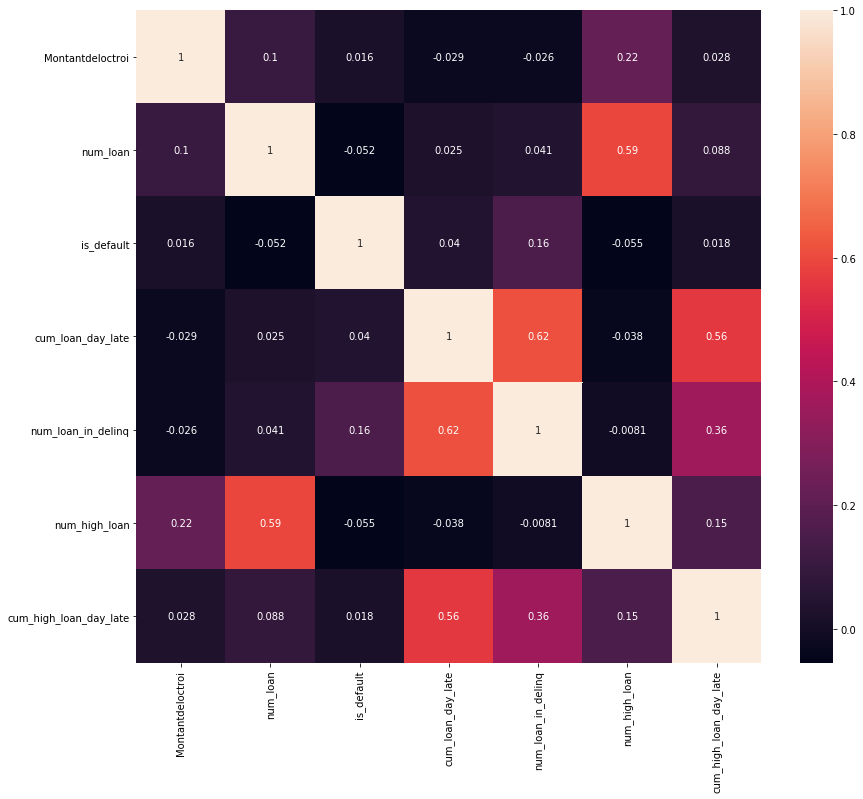

In [64]:
corr = train.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2g")

In [65]:
logit_scores_proba[y_train==1]

array([[0.27834438, 0.72165562],
       [0.60800298, 0.39199702],
       [0.39267823, 0.60732177],
       ...,
       [0.72845715, 0.27154285],
       [0.40245033, 0.59754967],
       [0.28794065, 0.71205935]])

In [66]:
#lets make a roc_curve visualization
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")

In [67]:
fpr_logit, tpr_logit, thresh_logit = roc_curve(y_train, logit_scores)
#plot_roc_curve(fpr_logit,tpr_logit)
print("AUC Score {}".format(roc_auc_score(y_train,logit_scores)))

AUC Score 0.820838059769996


In [68]:
#validate with the validation set
logit_scores_proba_val = logit.predict_proba(X_val_scaled)
logit_scores_val = logit_scores_proba_val[:,1]
fpr_logit_val, tpr_logit_val, thresh_logit_val = roc_curve(y_val, logit_scores_val)
#plot_roc_curve(fpr_logit_val,tpr_logit_val)
print("AUC Score {}".format(roc_auc_score(y_val,logit_scores_val)))

AUC Score 0.8138342854665644


In [69]:
logit_C_low = LogisticRegression(random_state=42, solver="saga", penalty="l1", class_weight="balanced", C=0.001, max_iter=1000)
logit_C_low.fit(X_train_scaled, y_train)
logit_C_low_scores_proba = logit_C_low.predict_proba(X_train_scaled)
logit_C_low_scores = logit_C_low_scores_proba[:,1]
fpr_logit_C_low, tpr_logit_C_low, thresh_logit_C_low = roc_curve(y_train, logit_C_low_scores)
#plot_roc_curve(fpr_logit_C_low,tpr_logit_C_low)
print("AUC Score {}".format(roc_auc_score(y_train,logit_C_low_scores)))

AUC Score 0.822075968257198


In [70]:
logit_C_high = LogisticRegression(random_state=42, solver="saga", penalty="l1", class_weight="balanced", C=1000, max_iter=1000)
logit_C_high.fit(X_train_scaled, y_train)
logit_C_high_scores_proba = logit_C_high.predict_proba(X_train_scaled)
logit_C_high_scores = logit_C_high_scores_proba[:,1]
fpr_logit_C_high, tpr_logit_C_high, thresh_logit_C_high = roc_curve(y_train, logit_C_high_scores)
print("AUC Score {}".format(roc_auc_score(y_train,logit_C_high_scores)))

AUC Score 0.8208557614696796


Text(0,0.5,'True Positive rate')

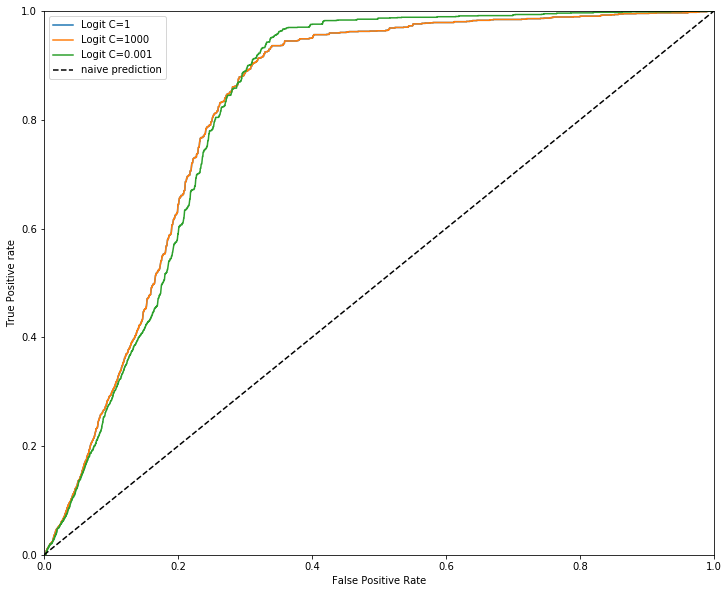

In [71]:
#lets make a roc_curve visualization
plt.figure(figsize=(12,10))
plt.plot(fpr_logit, tpr_logit, label="Logit C=1")
plt.plot(fpr_logit_C_high, tpr_logit_C_high , label="Logit C=1000")
plt.plot(fpr_logit_C_low, tpr_logit_C_low , label="Logit C=0.001")
plt.plot([0,1],[0,1], "k--", label="naive prediction")
plt.axis([0,1,0,1])
plt.legend(loc="best")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")

In [72]:
df_data[df_data.rContactID==3119][['rContactID' ,'disbursement_date','Montantdeloctroi','day_late','num_loan','is_default']]

,rContactID,disbursement_date,Montantdeloctroi,day_late,num_loan,is_default
1876,3119,2018-04-19,5000.0,0,1,False
10016,3119,2018-05-03,6000.0,0,2,False
16797,3119,2018-05-15,10000.0,0,3,False
33063,3119,2018-06-04,20000.0,0,4,False
64356,3119,2018-07-04,36000.0,20,5,False
143452,3119,2018-08-29,40000.0,0,6,False
184039,3119,2018-09-25,80000.0,4,7,False
244189,3119,2018-11-01,60000.0,0,8,False
288138,3119,2018-11-27,85000.0,36,9,False
399771,3119,2019-02-01,85000.0,0,10,False


In [73]:
(dd.Status==12).sum() /len(dd)


0.8551834675565249

In [75]:
ax = plt.figure(figsize=(10,8))
sns.distplot(dd.delta_date.dropna() , label='distribution du repayement')
plt.title('distribution du repayement')

AttributeError: 'DataFrame' object has no attribute 'delta_date'

<Figure size 720x576 with 0 Axes>

In [ ]:
dd[dd.Status==4]

In [ ]:
#dd['delta_date'] = 
dd['delta_date'] = (dd.last_payement - dd.disbursement_date).dt.days

In [ ]:
dd.groupby('rContactID').count().describe()[['loloanID']]

In [ ]:
dd.disbursement_date.describe()

In [ ]:
dd.groupby('disbursement_date').count().describe() #['loloanID']

In [ ]:
dd.groupby('disbursement_date').count()['loloanID'].mean()

In [45]:
bydate =dd.groupby('disbursement_date').count()['loloanID']

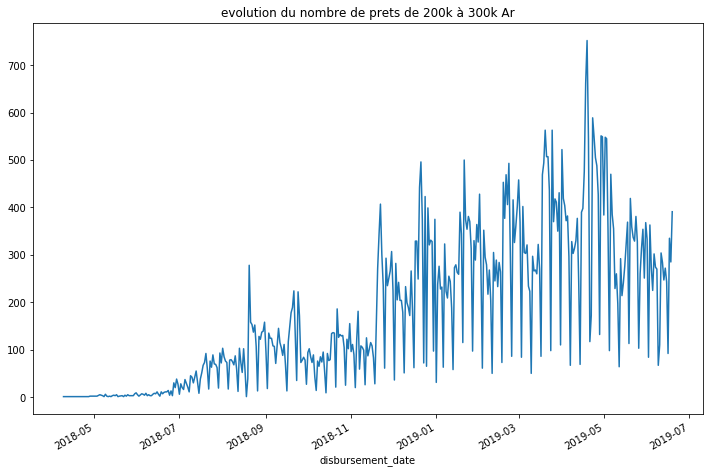

In [49]:
def plotTrend(bydate):
    bydate.plot(figsize=(12,8))
    plt.title('evolution du nombre de prets de 200k à 300k Ar')
plotTrend(bydate)

Remove Writeoff

In [85]:
neverWO = dd[dd.rContactID.isin( writeoff.rContactID.unique() )  ==False ]

In [82]:
neverWO = neverWO[neverWO.Status  ==4 ]

In [86]:
neverWO  = neverWO[['rContactID','is_default','predictid_score']].drop_duplicates()

In [87]:
pd.crosstab(neverWO.is_default,neverWO.predictid_score,margins=True).T

is_default,False,True,All
predictid_score,,,
0,1596,4,1600
1,5253,14,5267
2,9341,40,9381
3,7590,92,7682
4,3494,166,3660
5,3563,238,3801
6,2245,139,2384
7,2261,162,2423
8,1837,163,2000


In [219]:
dd[dd.predictid_score==0].rContactID.nunique()

1834

In [99]:
dd[(dd.predictid_score==0) & (dd.is_default==False)]

,loloanID,rContactID,disbursement_date,Montantdeloctroi,Status,last_payement,day_late,num_loan,is_default,cum_loan_day_late,num_loan_in_delinq,num_high_loan,cum_high_loan_day_late,proba,predicted_default,predictid_score
89233,287928,44967,2018-07-23,200000.0,12,2018-07-24,0,20,False,0,0.0,5,0,0.088147,False,0
90820,294336,44967,2018-07-24,200000.0,12,2018-07-24,0,21,False,0,0.0,6,0,0.072196,False,0
90955,294918,44967,2018-07-24,200000.0,12,2018-07-24,0,22,False,0,0.0,7,0,0.058945,False,0
91074,295393,44967,2018-07-24,200000.0,12,2018-08-02,0,23,False,0,0.0,8,0,0.048001,False,0
99126,326044,8190,2018-07-30,225000.0,12,2018-08-02,0,18,False,0,0.0,7,0,0.092952,False,0
103329,341985,44967,2018-08-02,200000.0,12,2018-08-02,0,24,False,0,0.0,9,0,0.039004,False,0
103330,341988,44967,2018-08-02,200000.0,12,2018-08-02,0,25,False,0,0.0,10,0,0.031637,False,0
103338,342007,44967,2018-08-02,200000.0,12,2018-08-16,0,26,False,0,0.0,11,0,0.025625,False,0
105246,349467,8190,2018-08-03,225000.0,12,2018-08-07,0,19,False,0,0.0,8,0,0.076205,False,0
111544,373581,8190,2018-08-07,225000.0,12,2018-08-18,0,20,False,0,0.0,9,0,0.062268,False,0


In [105]:
df_data[df_data.rContactID==10806][['loloanID' ,'rContactID','Montantdeloctroi','disbursement_date','num_loan_in_delinq','day_late','num_loan','num_loan_in_delinq']]

,loloanID,rContactID,Montantdeloctroi,disbursement_date,num_loan_in_delinq,day_late,num_loan,num_loan_in_delinq
9258,29261,10806,175000.0,2018-05-02,0.0,0,1,0.0
24448,78278,10806,175000.0,2018-05-25,0.0,0,2,0.0
49559,153486,10806,175000.0,2018-06-21,0.0,0,3,0.0
105605,350691,10806,225000.0,2018-08-03,0.0,0,4,0.0
153706,596155,10806,225000.0,2018-09-04,0.0,0,5,0.0
186569,747195,10806,157500.0,2018-09-27,0.0,0,6,0.0
238930,965404,10806,225000.0,2018-10-29,0.0,0,7,0.0
283839,1144802,10806,225000.0,2018-11-24,0.0,0,8,0.0
315291,1280719,10806,225000.0,2018-12-13,0.0,0,9,0.0
341664,1388293,10806,225000.0,2018-12-28,0.0,0,10,0.0


In [106]:
df_data[df_data.rContactID==8391][['loloanID' ,'rContactID','Montantdeloctroi','disbursement_date','num_loan_in_delinq','day_late','num_loan','num_loan_in_delinq']]

,loloanID,rContactID,Montantdeloctroi,disbursement_date,num_loan_in_delinq,day_late,num_loan,num_loan_in_delinq
5744,18514,8391,125000.0,2018-04-26,0.0,0,1,0.0
8524,26917,8391,125000.0,2018-05-01,0.0,0,2,0.0
33490,104905,8391,125000.0,2018-06-04,0.0,0,3,0.0
58079,175812,8391,120000.0,2018-06-28,0.0,0,4,0.0
60436,181707,8391,175000.0,2018-06-30,0.0,0,5,0.0
64350,192074,8391,175000.0,2018-07-04,0.0,0,6,0.0
65618,195423,8391,175000.0,2018-07-04,0.0,0,7,0.0
72534,222107,8391,175000.0,2018-07-10,0.0,0,8,0.0
74298,228926,8391,225000.0,2018-07-12,0.0,0,9,0.0
77781,242083,8391,225000.0,2018-07-14,0.0,0,10,0.0
